Implementation of grayscale and threshold filters for images.

In [25]:
import numpy
import requests
from numpy import ndarray, dtype, uint8, float32
from matplotlib import pyplot
from typing import Any
from io import BytesIO
from PIL import Image

In [26]:
def download_image(url: str) -> ndarray:
    """
    Download an image from a URL and return it as a NumPy array in RGB format.
    :param url: URL of the image to download.
    :return: The downloaded image as an RGB image.
    """
    response = requests.get(url)
    image_data: BytesIO = BytesIO(response.content)
    image: Image = Image.open(image_data)
    image_rgb: Image = image.convert("RGB")
    image_array: ndarray = numpy.array(image_rgb)
    return image_array


def convert_to_grayscale(color_image: ndarray) -> ndarray:
    """
    Convert a color image to a grayscale image by manually iterating through pixels.
    :param color_image: Input color image (H x W x 3).
    :remarks: The grayscale value is computed as: gray = 0.299 * R + 0.587 * G + 0.114 * B
    :return: Grayscale image (H x W) with pixel values in 0-255.
    """
    height: int = color_image.shape[0]
    width: int = color_image.shape[1]
    grayscale_image: ndarray = numpy.empty((height, width), dtype=uint8)

    for row in range(height):
        for col in range(width):
            red: int = int(color_image[row, col, 0])
            green: int = int(color_image[row, col, 1])
            blue: int = int(color_image[row, col, 2])
            # Compute weighted sum for grayscale value.
            gray_value: int = int(0.299 * red + 0.587 * green + 0.114 * blue)
            # Ensure the value is within [0, 255]
            if gray_value > 255:
                gray_value = 255
            grayscale_image[row, col] = gray_value

    return grayscale_image


def threshold_image(grayscale_image: ndarray, threshold_value: int = 128) -> ndarray:
    """
    Convert a grayscale image into a binary image (black or white) using a manual threshold.
    :param grayscale_image: Input grayscale image (H x W).
    :param threshold_value: Threshold value. Defaults to 128.
    :remarks: If the pixel value is less than the threshold, it is set to 0 (black), otherwise, it is set to 255 (white).
    :return: Binary (thresholded) image (H x W).
    """
    height: int = grayscale_image.shape[0]
    width: int = grayscale_image.shape[1]
    binary_image: ndarray = numpy.empty((height, width), dtype=numpy.uint8)

    for row in range(height):
        for col in range(width):
            if grayscale_image[row, col] < threshold_value:
                binary_image[row, col] = 0
            else:
                binary_image[row, col] = 255

    return binary_image


def convert_gray_to_rgb(grayscale_image: ndarray) -> ndarray:
    """
    Convert a grayscale image (H x W) to an RGB image (H x W x 3) by replicating the channel.
    :param grayscale_image: Input grayscale image.
    :return: RGB image with 3 identical channels.
    """
    height: int = grayscale_image.shape[0]
    width: int = grayscale_image.shape[1]
    rgb_image: ndarray = numpy.empty((height, width, 3), dtype=uint8)

    for row in range(height):
        for col in range(width):
            gray_pixel: int = int(grayscale_image[row, col])
            rgb_image[row, col] = [gray_pixel, gray_pixel, gray_pixel]

    return rgb_image

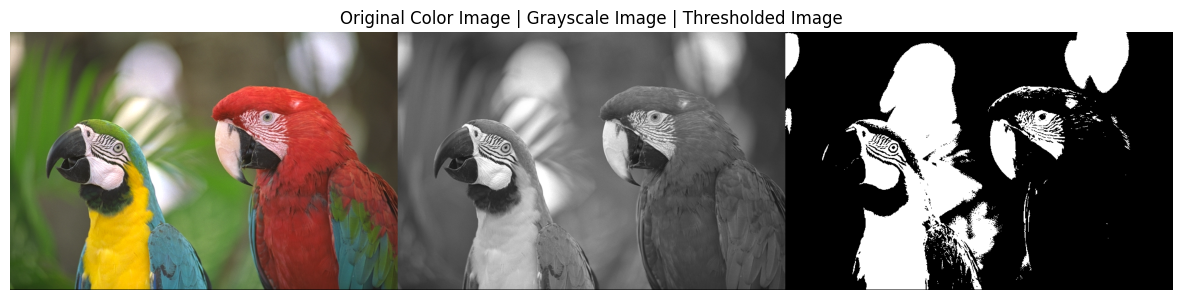

In [27]:
original_color_image: ndarray = download_image('https://raw.githubusercontent.com/opencv/opencv_extra/refs/heads/4.x/testdata/cv/edgefilter/kodim23.png')
grayscale_image: ndarray = convert_to_grayscale(original_color_image)
binary_threshold_image: ndarray = threshold_image(grayscale_image)

# Convert the grayscale and thresholded images to RGB
# before merging them into a single image.
grayscale_image_rgb: ndarray = convert_gray_to_rgb(grayscale_image)
threshold_image_rgb: ndarray = convert_gray_to_rgb(binary_threshold_image)

# Merge the images.
merged_image: ndarray = numpy.concatenate(
    (original_color_image, grayscale_image_rgb, threshold_image_rgb),
    axis=1
)

# Display the merged image.
pyplot.figure(figsize=(15, 5))
pyplot.imshow(merged_image)
pyplot.axis("off")
pyplot.title("Original Color Image | Grayscale Image | Thresholded Image")
pyplot.show()